<a href="https://colab.research.google.com/github/Nusratnabi/problem-solving/blob/master/mask_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mask R-CNN demo on PyTorch

### Get the full repository from github

In [1]:
!git clone https://github.com/vismiroglou/mask_rcnn

Cloning into 'mask_rcnn'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 46 (delta 10), reused 37 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 20.97 MiB | 11.93 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
%cd /content/mask_rcnn

/content/mask_rcnn


### Import required packages

In [3]:
import os
import random
from glob import glob

import cv2
import numpy as np
from pycocotools.coco import COCO

import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn

from visualize import display_instances
from utils import load_image_for_model

### Load a pre-trained Mask R-CNN directly from torchvision

In [4]:
# Load the model
model = maskrcnn_resnet50_fpn(weights='COCO_V1', box_score_thresh=0.5)
model.eval()

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


100%|██████████| 170M/170M [00:01<00:00, 113MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

### Load images and class labels

In [5]:
# Get image paths
images = glob(os.path.join('data', 'images', '*.jpg'))
# Annotations for available images
coco = COCO("data/annotations.json")

print('\nCOCO Categories:\n')
for cat in coco.loadCats(coco.getCatIds()):
    print(cat['name'])

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

COCO Categories:

person
bicycle
car
motorcycle
airplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
couch
potted plant
bed
dining table
toilet
tv
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


### Use the model on a random image

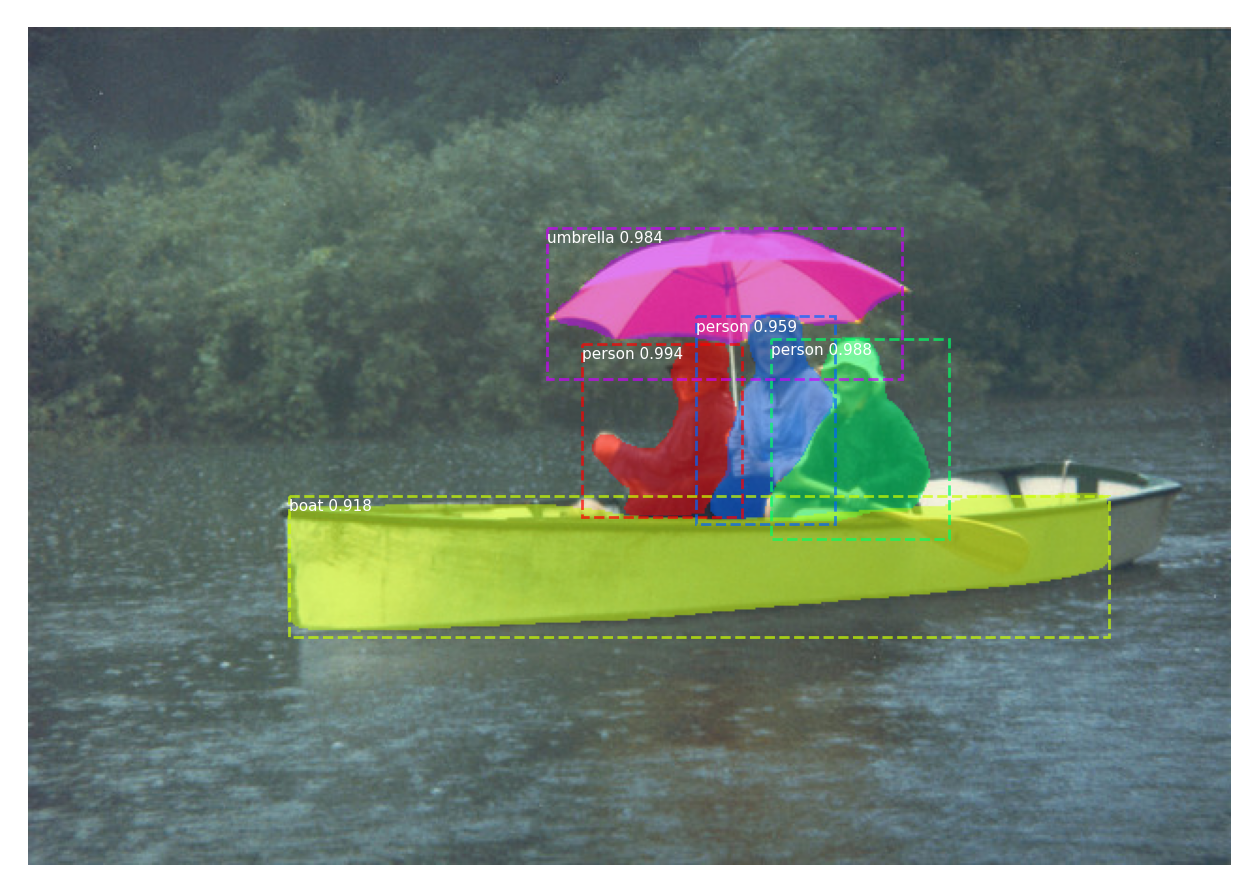

In [6]:
# Get a random image
img_model, img_org = load_image_for_model(random.choice(images))

with torch.no_grad():
    results = model(img_model)
    r = results[0]
    display_instances(img_org, r['boxes'], r['masks'], r['labels'], coco, r['scores'])

Saving Screenshot 2025-09-29 101855.png to Screenshot 2025-09-29 101855.png


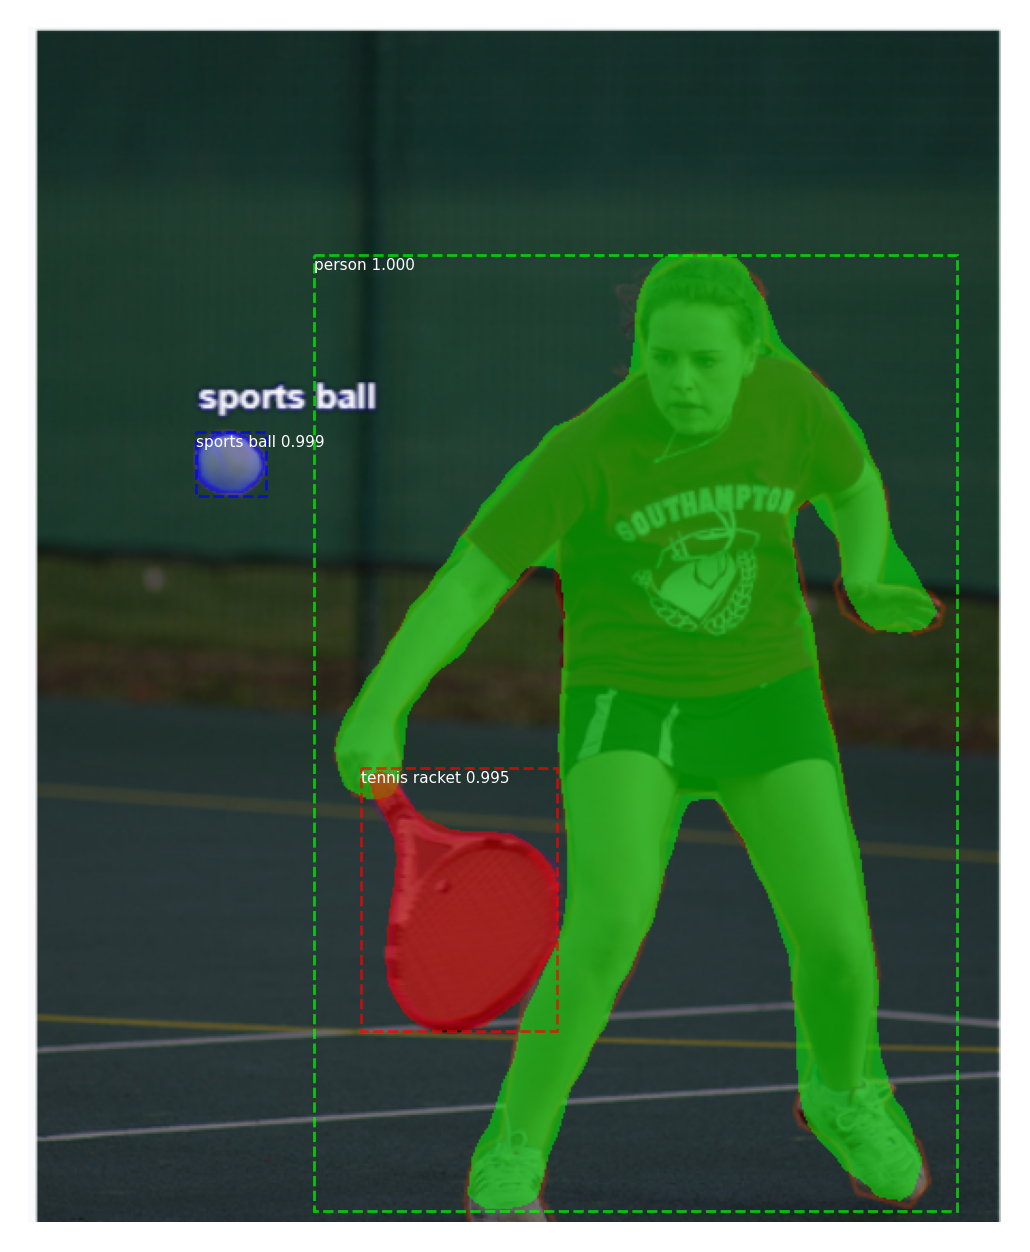

In [7]:
from google.colab import files
uploads = files.upload()

for upload in uploads.keys():
  img_model, img_org = load_image_for_model(upload)

with torch.no_grad():
  results = model(img_model)
  r = results[0]
  display_instances(img_org, r['boxes'], r['masks'], r['labels'], coco, r['scores'])

In [8]:
print(model)

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [22]:
from collections import OrderedDict
from typing import Any, Callable, Optional

from torch import nn
from torchvision.ops import MultiScaleRoIAlign

from torchvision.transforms._presets import ObjectDetection
from torchvision.models._api import register_model, Weights, WeightsEnum
from torchvision.models._meta import _COCO_CATEGORIES
from torchvision.models._utils import _ovewrite_value_param, handle_legacy_interface
from torchvision.models.resnet import resnet50, ResNet50_Weights
from torchvision.models.detection._utils import overwrite_eps
from torchvision.models.detection.backbone_utils import _resnet_fpn_extractor, _validate_trainable_layers
from torchvision.models.detection.faster_rcnn import _default_anchorgen, FasterRCNN, FastRCNNConvFCHead, RPNHead

from torchvision.models.detection import MaskRCNN
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

# Function to create a Mask R-CNN model
# def custom_maskrcnn_resnet50_fpn_v2(num_classes=91, pretrained=True):
#     # Create backbone
#     backbone = resnet_fpn_backbone('resnet50', pretrained=pretrained)

#     # Create model
#     model = MaskRCNN(backbone, num_classes=num_classes)
#     return model

# # Now call it
# model = custom_maskrcnn_resnet50_fpn_v2()
# print(model)



# __all__ = [
#     "MaskRCNN",
#     "MaskRCNN_ResNet50_FPN_Weights",
#     "MaskRCNN_ResNet50_FPN_V2_Weights",
#     "maskrcnn_resnet50_fpn",
#     "maskrcnn_resnet50_fpn_v2",
# ]


# class MaskRCNN(FasterRCNN):
#     """
#     Implements Mask R-CNN.

#     The input to the model is expected to be a list of tensors, each of shape [C, H, W], one for each
#     image, and should be in 0-1 range. Different images can have different sizes.

#     The behavior of the model changes depending on if it is in training or evaluation mode.

#     During training, the model expects both the input tensors and targets (list of dictionary),
#     containing:
#         - boxes (``FloatTensor[N, 4]``): the ground-truth boxes in ``[x1, y1, x2, y2]`` format, with
#           ``0 <= x1 < x2 <= W`` and ``0 <= y1 < y2 <= H``.
#         - labels (Int64Tensor[N]): the class label for each ground-truth box
#         - masks (UInt8Tensor[N, H, W]): the segmentation binary masks for each instance

#     The model returns a Dict[Tensor] during training, containing the classification and regression
#     losses for both the RPN and the R-CNN, and the mask loss.

#     During inference, the model requires only the input tensors, and returns the post-processed
#     predictions as a List[Dict[Tensor]], one for each input image. The fields of the Dict are as
#     follows:
#         - boxes (``FloatTensor[N, 4]``): the predicted boxes in ``[x1, y1, x2, y2]`` format, with
#           ``0 <= x1 < x2 <= W`` and ``0 <= y1 < y2 <= H``.
#         - labels (Int64Tensor[N]): the predicted labels for each image
#         - scores (Tensor[N]): the scores or each prediction
#         - masks (FloatTensor[N, 1, H, W]): the predicted masks for each instance, in 0-1 range. In order to
#           obtain the final segmentation masks, the soft masks can be thresholded, generally
#           with a value of 0.5 (mask >= 0.5)

#     Args:
#         backbone (nn.Module): the network used to compute the features for the model.
#             It should contain an out_channels attribute, which indicates the number of output
#             channels that each feature map has (and it should be the same for all feature maps).
#             The backbone should return a single Tensor or and OrderedDict[Tensor].
#         num_classes (int): number of output classes of the model (including the background).
#             If box_predictor is specified, num_classes should be None.
#         min_size (int): Images are rescaled before feeding them to the backbone:
#             we attempt to preserve the aspect ratio and scale the shorter edge
#             to ``min_size``. If the resulting longer edge exceeds ``max_size``,
#             then downscale so that the longer edge does not exceed ``max_size``.
#             This may result in the shorter edge beeing lower than ``min_size``.
#         max_size (int): See ``min_size``.
#         image_mean (Tuple[float, float, float]): mean values used for input normalization.
#             They are generally the mean values of the dataset on which the backbone has been trained
#             on
#         image_std (Tuple[float, float, float]): std values used for input normalization.
#             They are generally the std values of the dataset on which the backbone has been trained on
#         rpn_anchor_generator (AnchorGenerator): module that generates the anchors for a set of feature
#             maps.
#         rpn_head (nn.Module): module that computes the objectness and regression deltas from the RPN
#         rpn_pre_nms_top_n_train (int): number of proposals to keep before applying NMS during training
#         rpn_pre_nms_top_n_test (int): number of proposals to keep before applying NMS during testing
#         rpn_post_nms_top_n_train (int): number of proposals to keep after applying NMS during training
#         rpn_post_nms_top_n_test (int): number of proposals to keep after applying NMS during testing
#         rpn_nms_thresh (float): NMS threshold used for postprocessing the RPN proposals
#         rpn_fg_iou_thresh (float): minimum IoU between the anchor and the GT box so that they can be
#             considered as positive during training of the RPN.
#         rpn_bg_iou_thresh (float): maximum IoU between the anchor and the GT box so that they can be
#             considered as negative during training of the RPN.
#         rpn_batch_size_per_image (int): number of anchors that are sampled during training of the RPN
#             for computing the loss
#         rpn_positive_fraction (float): proportion of positive anchors in a mini-batch during training
#             of the RPN
#         rpn_score_thresh (float): only return proposals with an objectness score greater than rpn_score_thresh
#         box_roi_pool (MultiScaleRoIAlign): the module which crops and resizes the feature maps in
#             the locations indicated by the bounding boxes
#         box_head (nn.Module): module that takes the cropped feature maps as input
#         box_predictor (nn.Module): module that takes the output of box_head and returns the
#             classification logits and box regression deltas.
#         box_score_thresh (float): during inference, only return proposals with a classification score
#             greater than box_score_thresh
#         box_nms_thresh (float): NMS threshold for the prediction head. Used during inference
#         box_detections_per_img (int): maximum number of detections per image, for all classes.
#         box_fg_iou_thresh (float): minimum IoU between the proposals and the GT box so that they can be
#             considered as positive during training of the classification head
#         box_bg_iou_thresh (float): maximum IoU between the proposals and the GT box so that they can be
#             considered as negative during training of the classification head
#         box_batch_size_per_image (int): number of proposals that are sampled during training of the
#             classification head
#         box_positive_fraction (float): proportion of positive proposals in a mini-batch during training
#             of the classification head
#         bbox_reg_weights (Tuple[float, float, float, float]): weights for the encoding/decoding of the
#             bounding boxes
#         mask_roi_pool (MultiScaleRoIAlign): the module which crops and resizes the feature maps in
#              the locations indicated by the bounding boxes, which will be used for the mask head.
#         mask_head (nn.Module): module that takes the cropped feature maps as input
#         mask_predictor (nn.Module): module that takes the output of the mask_head and returns the
#             segmentation mask logits

#     Example::

#         >>> import torch
#         >>> import torchvision
#         >>> from torchvision.models.detection import MaskRCNN
#         >>> from torchvision.models.detection.anchor_utils import AnchorGenerator
#         >>>
#         >>> # load a pre-trained model for classification and return
#         >>> # only the features
#         >>> backbone = torchvision.models.mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT).features
#         >>> # MaskRCNN needs to know the number of
#         >>> # output channels in a backbone. For mobilenet_v2, it's 1280
#         >>> # so we need to add it here,
#         >>> backbone.out_channels = 1280
#         >>>
#         >>> # let's make the RPN generate 5 x 3 anchors per spatial
#         >>> # location, with 5 different sizes and 3 different aspect
#         >>> # ratios. We have a Tuple[Tuple[int]] because each feature
#         >>> # map could potentially have different sizes and
#         >>> # aspect ratios
#         >>> anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
#         >>>                                    aspect_ratios=((0.5, 1.0, 2.0),))
#         >>>
#         >>> # let's define what are the feature maps that we will
#         >>> # use to perform the region of interest cropping, as well as
#         >>> # the size of the crop after rescaling.
#         >>> # if your backbone returns a Tensor, featmap_names is expected to
#         >>> # be ['0']. More generally, the backbone should return an
#         >>> # OrderedDict[Tensor], and in featmap_names you can choose which
#         >>> # feature maps to use.
#         >>> roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
#         >>>                                                 output_size=7,
#         >>>                                                 sampling_ratio=2)
#         >>>
#         >>> mask_roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
#         >>>                                                      output_size=14,
#         >>>                                                      sampling_ratio=2)
#         >>> # put the pieces together inside a MaskRCNN model
#         >>> model = MaskRCNN(backbone,
#         >>>                  num_classes=2,
#         >>>                  rpn_anchor_generator=anchor_generator,
#         >>>                  box_roi_pool=roi_pooler,
#         >>>                  mask_roi_pool=mask_roi_pooler)
#         >>> model.eval()
#         >>> x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
#         >>> predictions = model(x)
#     """

#     def __init__(
#         self,
#         backbone,
#         num_classes=None,
#         # transform parameters
#         min_size=800,
#         max_size=1333,
#         image_mean=None,
#         image_std=None,
#         # RPN parameters
#         rpn_anchor_generator=None,
#         rpn_head=None,
#         rpn_pre_nms_top_n_train=2000,
#         rpn_pre_nms_top_n_test=1000,
#         rpn_post_nms_top_n_train=2000,
#         rpn_post_nms_top_n_test=1000,
#         rpn_nms_thresh=0.7,
#         rpn_fg_iou_thresh=0.7,
#         rpn_bg_iou_thresh=0.3,
#         rpn_batch_size_per_image=256,
#         rpn_positive_fraction=0.5,
#         rpn_score_thresh=0.0,
#         # Box parameters
#         box_roi_pool=None,
#         box_head=None,
#         box_predictor=None,
#         box_score_thresh=0.05,
#         box_nms_thresh=0.5,
#         box_detections_per_img=100,
#         box_fg_iou_thresh=0.5,
#         box_bg_iou_thresh=0.5,
#         box_batch_size_per_image=512,
#         box_positive_fraction=0.25,
#         bbox_reg_weights=None,
#         # Mask parameters
#         mask_roi_pool=None,
#         mask_head=None,
#         mask_predictor=None,
#         **kwargs,
#     ):

#         if not isinstance(mask_roi_pool, (MultiScaleRoIAlign, type(None))):
#             raise TypeError(
#                 f"mask_roi_pool should be of type MultiScaleRoIAlign or None instead of {type(mask_roi_pool)}"
#             )

#         if num_classes is not None:
#             if mask_predictor is not None:
#                 raise ValueError("num_classes should be None when mask_predictor is specified")

#         out_channels = backbone.out_channels

#         if mask_roi_pool is None:
#             mask_roi_pool = MultiScaleRoIAlign(featmap_names=["0", "1", "2", "3"], output_size=14, sampling_ratio=2)

#         if mask_head is None:
#             mask_layers = (256, 256, 256, 256)
#             mask_dilation = 1
#             mask_head = MaskRCNNHeads(out_channels, mask_layers, mask_dilation)

#         if mask_predictor is None:
#             mask_predictor_in_channels = 256  # == mask_layers[-1]
#             mask_dim_reduced = 256
#             mask_predictor = MaskRCNNPredictor(mask_predictor_in_channels, mask_dim_reduced, num_classes)

#         super().__init__(
#             backbone,
#             num_classes,
#             # transform parameters
#             min_size,
#             max_size,
#             image_mean,
#             image_std,
#             # RPN-specific parameters
#             rpn_anchor_generator,
#             rpn_head,
#             rpn_pre_nms_top_n_train,
#             rpn_pre_nms_top_n_test,
#             rpn_post_nms_top_n_train,
#             rpn_post_nms_top_n_test,
#             rpn_nms_thresh,
#             rpn_fg_iou_thresh,
#             rpn_bg_iou_thresh,
#             rpn_batch_size_per_image,
#             rpn_positive_fraction,
#             rpn_score_thresh,
#             # Box parameters
#             box_roi_pool,
#             box_head,
#             box_predictor,
#             box_score_thresh,
#             box_nms_thresh,
#             box_detections_per_img,
#             box_fg_iou_thresh,
#             box_bg_iou_thresh,
#             box_batch_size_per_image,
#             box_positive_fraction,
#             bbox_reg_weights,
#             **kwargs,
#         )

#         self.roi_heads.mask_roi_pool = mask_roi_pool
#         self.roi_heads.mask_head = mask_head
#         self.roi_heads.mask_predictor = mask_predictor


# class MaskRCNNHeads(nn.Sequential):
#     _version = 2

#     def __init__(self, in_channels, layers, dilation, norm_layer: Optional[Callable[..., nn.Module]] = None):
#         """
#         Args:
#             in_channels (int): number of input channels
#             layers (list): feature dimensions of each FCN layer
#             dilation (int): dilation rate of kernel
#             norm_layer (callable, optional): Module specifying the normalization layer to use. Default: None
#         """
#         blocks = []
#         next_feature = in_channels
#         for layer_features in layers:
#             blocks.append(
#                 misc_nn_ops.Conv2dNormActivation(
#                     next_feature,
#                     layer_features,
#                     kernel_size=3,
#                     stride=1,
#                     padding=dilation,
#                     dilation=dilation,
#                     norm_layer=norm_layer,
#                 )
#             )
#             next_feature = layer_features

#         super().__init__(*blocks)
#         for layer in self.modules():
#             if isinstance(layer, nn.Conv2d):
#                 nn.init.kaiming_normal_(layer.weight, mode="fan_out", nonlinearity="relu")
#                 if layer.bias is not None:
#                     nn.init.zeros_(layer.bias)

#     def _load_from_state_dict(
#         self,
#         state_dict,
#         prefix,
#         local_metadata,
#         strict,
#         missing_keys,
#         unexpected_keys,
#         error_msgs,
#     ):
#         version = local_metadata.get("version", None)

#         if version is None or version < 2:
#             num_blocks = len(self)
#             for i in range(num_blocks):
#                 for type in ["weight", "bias"]:
#                     old_key = f"{prefix}mask_fcn{i+1}.{type}"
#                     new_key = f"{prefix}{i}.0.{type}"
#                     if old_key in state_dict:
#                         state_dict[new_key] = state_dict.pop(old_key)

#         super()._load_from_state_dict(
#             state_dict,
#             prefix,
#             local_metadata,
#             strict,
#             missing_keys,
#             unexpected_keys,
#             error_msgs,
#         )


# class MaskRCNNPredictor(nn.Sequential):
#     def __init__(self, in_channels, dim_reduced, num_classes):
#         super().__init__(
#             OrderedDict(
#                 [
#                     ("conv5_mask", nn.ConvTranspose2d(in_channels, dim_reduced, 2, 2, 0)),
#                     ("relu", nn.ReLU(inplace=True)),
#                     ("mask_fcn_logits", nn.Conv2d(dim_reduced, num_classes, 1, 1, 0)),
#                 ]
#             )
#         )

#         for name, param in self.named_parameters():
#             if "weight" in name:
#                 nn.init.kaiming_normal_(param, mode="fan_out", nonlinearity="relu")
#             # elif "bias" in name:
#             #     nn.init.constant_(param, 0)


# _COMMON_META = {
#     "categories": _COCO_CATEGORIES,
#     "min_size": (1, 1),
# }


# class MaskRCNN_ResNet50_FPN_Weights(WeightsEnum):
#     COCO_V1 = Weights(
#         url="https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth",
#         transforms=ObjectDetection,
#         meta={
#             **_COMMON_META,
#             "num_params": 44401393,
#             "recipe": "https://github.com/pytorch/vision/tree/main/references/detection#mask-r-cnn",
#             "_metrics": {
#                 "COCO-val2017": {
#                     "box_map": 37.9,
#                     "mask_map": 34.6,
#                 }
#             },
#             "_ops": 134.38,
#             "_file_size": 169.84,
#             "_docs": """These weights were produced by following a similar training recipe as on the paper.""",
#         },
#     )
#     DEFAULT = COCO_V1


# class MaskRCNN_ResNet50_FPN_V2_Weights(WeightsEnum):
#     COCO_V1 = Weights(
#         url="https://download.pytorch.org/models/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth",
#         transforms=ObjectDetection,
#         meta={
#             **_COMMON_META,
#             "num_params": 46359409,
#             "recipe": "https://github.com/pytorch/vision/pull/5773",
#             "_metrics": {
#                 "COCO-val2017": {
#                     "box_map": 47.4,
#                     "mask_map": 41.8,
#                 }
#             },
#             "_ops": 333.577,
#             "_file_size": 177.219,
#             "_docs": """These weights were produced using an enhanced training recipe to boost the model accuracy.""",
#         },
#     )
# import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn

# Use the built-in model with pretrained weights
# DEFAULT = COCO_V1
model = maskrcnn_resnet50_fpn(weights="DEFAULT")  # Colab-friendly, no errors
print(model)


# model = custom_maskrcnn_resnet50_fpn_v2(weights="DEFAULT")
# @register_model(name="custom_maskrcnn_resnet50_fpn_v2")
# @handle_legacy_interface (
#     weights=("pretrained", MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1),
#     weights_backbone=("pretrained_backbone", ResNet50_Weights.IMAGENET1K_V1),
# )

# from torchvision.models import get_model

# model = get_model("custom_maskrcnn_resnet50_fpn_v2")
# print(model)


# def maskrcnn_resnet50_fpn(
#     *,
#     weights: Optional[MaskRCNN_ResNet50_FPN_Weights] = None,
#     progress: bool = True,
#     num_classes: Optional[int] = None,
#     weights_backbone: Optional[ResNet50_Weights] = ResNet50_Weights.IMAGENET1K_V1,
#     trainable_backbone_layers: Optional[int] = None,
#     **kwargs: Any,
# ) -> MaskRCNN:
#     """Mask R-CNN model with a ResNet-50-FPN backbone from the `Mask R-CNN
#     <https://arxiv.org/abs/1703.06870>`_ paper.

#     .. betastatus:: detection module

#     The input to the model is expected to be a list of tensors, each of shape ``[C, H, W]``, one for each
#     image, and should be in ``0-1`` range. Different images can have different sizes.

#     The behavior of the model changes depending on if it is in training or evaluation mode.

#     During training, the model expects both the input tensors and targets (list of dictionary),
#     containing:

#         - boxes (``FloatTensor[N, 4]``): the ground-truth boxes in ``[x1, y1, x2, y2]`` format, with
#           ``0 <= x1 < x2 <= W`` and ``0 <= y1 < y2 <= H``.
#         - labels (``Int64Tensor[N]``): the class label for each ground-truth box
#         - masks (``UInt8Tensor[N, H, W]``): the segmentation binary masks for each instance

#     The model returns a ``Dict[Tensor]`` during training, containing the classification and regression
#     losses for both the RPN and the R-CNN, and the mask loss.

#     During inference, the model requires only the input tensors, and returns the post-processed
#     predictions as a ``List[Dict[Tensor]]``, one for each input image. The fields of the ``Dict`` are as
#     follows, where ``N`` is the number of detected instances:

#         - boxes (``FloatTensor[N, 4]``): the predicted boxes in ``[x1, y1, x2, y2]`` format, with
#           ``0 <= x1 < x2 <= W`` and ``0 <= y1 < y2 <= H``.
#         - labels (``Int64Tensor[N]``): the predicted labels for each instance
#         - scores (``Tensor[N]``): the scores or each instance
#         - masks (``UInt8Tensor[N, 1, H, W]``): the predicted masks for each instance, in ``0-1`` range. In order to
#           obtain the final segmentation masks, the soft masks can be thresholded, generally
#           with a value of 0.5 (``mask >= 0.5``)

#     For more details on the output and on how to plot the masks, you may refer to :ref:`instance_seg_output`.

#     Mask R-CNN is exportable to ONNX for a fixed batch size with inputs images of fixed size.

#     Example::

#         >>> model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT)
#         >>> model.eval()
#         >>> x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
#         >>> predictions = model(x)
#         >>>
#         >>> # optionally, if you want to export the model to ONNX:
#         >>> torch.onnx.export(model, x, "mask_rcnn.onnx", opset_version = 11)

#     Args:
#         weights (:class:`~torchvision.models.detection.MaskRCNN_ResNet50_FPN_Weights`, optional): The
#             pretrained weights to use. See
#             :class:`~torchvision.models.detection.MaskRCNN_ResNet50_FPN_Weights` below for
#             more details, and possible values. By default, no pre-trained
#             weights are used.
#         progress (bool, optional): If True, displays a progress bar of the
#             download to stderr. Default is True.
#         num_classes (int, optional): number of output classes of the model (including the background)
#         weights_backbone (:class:`~torchvision.models.ResNet50_Weights`, optional): The
#             pretrained weights for the backbone.
#         trainable_backbone_layers (int, optional): number of trainable (not frozen) layers starting from
#             final block. Valid values are between 0 and 5, with 5 meaning all backbone layers are
#             trainable. If ``None`` is passed (the default) this value is set to 3.
#         **kwargs: parameters passed to the ``torchvision.models.detection.mask_rcnn.MaskRCNN``
#             base class. Please refer to the `source code
#             <https://github.com/pytorch/vision/blob/main/torchvision/models/detection/mask_rcnn.py>`_
#             for more details about this class.

#     .. autoclass:: torchvision.models.detection.MaskRCNN_ResNet50_FPN_Weights
#         :members:
#     """
#     weights = MaskRCNN_ResNet50_FPN_Weights.verify(weights)
#     weights_backbone = ResNet50_Weights.verify(weights_backbone)

#     if weights is not None:
#         weights_backbone = None
#         num_classes = _ovewrite_value_param("num_classes", num_classes, len(weights.meta["categories"]))
#     elif num_classes is None:
#         num_classes = 91

#     is_trained = weights is not None or weights_backbone is not None
#     trainable_backbone_layers = _validate_trainable_layers(is_trained, trainable_backbone_layers, 5, 3)
#     norm_layer = misc_nn_ops.FrozenBatchNorm2d if is_trained else nn.BatchNorm2d

#     backbone = resnet50(weights=weights_backbone, progress=progress, norm_layer=norm_layer)
#     backbone = _resnet_fpn_extractor(backbone, trainable_backbone_layers)
#     model = MaskRCNN(backbone, num_classes=num_classes, **kwargs)

#     if weights is not None:
#         model.load_state_dict(weights.get_state_dict(progress=progress, check_hash=True))
#         if weights == MaskRCNN_ResNet50_FPN_Weights.COCO_V1:
#             overwrite_eps(model, 0.0)

#     return model


# @register_model()
# @handle_legacy_interface(
#     weights=("pretrained", MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1),
#     weights_backbone=("pretrained_backbone", ResNet50_Weights.IMAGENET1K_V1),
# )
# def maskrcnn_resnet50_fpn_v2(
#     *,
#     weights: Optional[MaskRCNN_ResNet50_FPN_V2_Weights] = None,
#     progress: bool = True,
#     num_classes: Optional[int] = None,
#     weights_backbone: Optional[ResNet50_Weights] = None,
#     trainable_backbone_layers: Optional[int] = None,
#     **kwargs: Any,
# ) -> MaskRCNN:
#     """Improved Mask R-CNN model with a ResNet-50-FPN backbone from the `Benchmarking Detection Transfer
#     Learning with Vision Transformers <https://arxiv.org/abs/2111.11429>`_ paper.

#     .. betastatus:: detection module

#     :func:`~torchvision.models.detection.maskrcnn_resnet50_fpn` for more details.

#     Args:
#         weights (:class:`~torchvision.models.detection.MaskRCNN_ResNet50_FPN_V2_Weights`, optional): The
#             pretrained weights to use. See
#             :class:`~torchvision.models.detection.MaskRCNN_ResNet50_FPN_V2_Weights` below for
#             more details, and possible values. By default, no pre-trained
#             weights are used.
#         progress (bool, optional): If True, displays a progress bar of the
#             download to stderr. Default is True.
#         num_classes (int, optional): number of output classes of the model (including the background)
#         weights_backbone (:class:`~torchvision.models.ResNet50_Weights`, optional): The
#             pretrained weights for the backbone.
#         trainable_backbone_layers (int, optional): number of trainable (not frozen) layers starting from
#             final block. Valid values are between 0 and 5, with 5 meaning all backbone layers are
#             trainable. If ``None`` is passed (the default) this value is set to 3.
#         **kwargs: parameters passed to the ``torchvision.models.detection.mask_rcnn.MaskRCNN``
#             base class. Please refer to the `source code
#             <https://github.com/pytorch/vision/blob/main/torchvision/models/detection/mask_rcnn.py>`_
#             for more details about this class.

#     .. autoclass:: torchvision.models.detection.MaskRCNN_ResNet50_FPN_V2_Weights
#         :members:
#     """
#     weights = MaskRCNN_ResNet50_FPN_V2_Weights.verify(weights)
#     weights_backbone = ResNet50_Weights.verify(weights_backbone)

#     if weights is not None:
#         weights_backbone = None
#         num_classes = _ovewrite_value_param("num_classes", num_classes, len(weights.meta["categories"]))
#     elif num_classes is None:
#         num_classes = 91

#     is_trained = weights is not None or weights_backbone is not None
#     trainable_backbone_layers = _validate_trainable_layers(is_trained, trainable_backbone_layers, 5, 3)

#     backbone = resnet50(weights=weights_backbone, progress=progress)
#     backbone = _resnet_fpn_extractor(backbone, trainable_backbone_layers, norm_layer=nn.BatchNorm2d)
#     rpn_anchor_generator = _default_anchorgen()
#     rpn_head = RPNHead(backbone.out_channels, rpn_anchor_generator.num_anchors_per_location()[0], conv_depth=2)
#     box_head = FastRCNNConvFCHead(
#         (backbone.out_channels, 7, 7), [256, 256, 256, 256], [1024], norm_layer=nn.BatchNorm2d
#     )
#     mask_head = MaskRCNNHeads(backbone.out_channels, [256, 256, 256, 256], 1, norm_layer=nn.BatchNorm2d)
#     model = MaskRCNN(
#         backbone,
#         num_classes=num_classes,
#         rpn_anchor_generator=rpn_anchor_generator,
#         rpn_head=rpn_head,
#         box_head=box_head,
#         mask_head=mask_head,
#         **kwargs,
#     )

#     if weights is not None:
#         model.load_state_dict(weights.get_state_dict(progress=progress, check_hash=True))

#     return model

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [25]:
from PIL import Image
import torchvision.transforms as T
import os
import random


# Path to your dataset folder
dataset_path = "data/images/"

# List all image files
all_images = [f for f in os.listdir(dataset_path) if f.endswith((".png", ".jpg", ".jpeg"))]

# Choose a random image
random_image_name = random.choice(all_images)
print("Selected image:", random_image_name)

# Open it
img_org = Image.open(os.path.join(dataset_path, random_image_name))
img_org.show()  # or use plt.imshow(img_org) if you prefer matplotlib

transform = T.ToTensor()
img_model = transform(img_org)   # shape (3, H, W)
img_model = [img_model]          # model expects list of images

Selected image: 000000302990.jpg
